## Równanie ciepła w 2D i w czasie metodą elementu skończonego

### Zagadnienie ###

$$\renewcommand{\vec}[1]{\underline{#1}}$$
Mamy do rozwiązania: 
$$
\begin{align}
u_t - \Delta u &= f \quad \textrm{w } \Omega \\
u\mid_{\partial\Omega} &= g \\
\frac{\partial u}{\partial n} &= 0
\end{align}
$$

Dyskretyzujemy czas: $$u_t \approx \frac{u^{n+1}-u^n}{\tau}$$ by otrzymać:

$$\frac{u^{n+1}-u^n}{\tau} + \Delta u^{n+1} = f^{n+1}$$

co po przekształceniu daje $N$ równań różniczkowych do rozwiązania:

$$u^{n+1} - \tau\Delta u^{n+1} = u^n + \tau f^{n+1} \tag*{($0 \leq n \leq N$)}$$

gdzie $u^n(\vec{x}) = u(\vec{x},t_n)$ i $f^{n+1}$ są danymi, a szukaną jest $u^{n+1}$.

### MES ###

Równania kolejno rozwiązujemy metodą elementu skończonego.

Zagadnienie $n+1$ postawione w formie słabej:

$$a(u,v) = \int_{\Omega}(u-\tau\Delta u)v d\Omega = \int_{\Omega}(u^{n} + \tau f^{n+1})v d\Omega = l_{n+1}(v) \quad \forall v$$
Z twierdzenia Gaussa i założenia $\frac{\partial u}{\partial n} = 0$ otrzymujemy:
$$\begin{align}
\int_{\Omega}\nabla\cdot(v\nabla u) d\Omega &= \int_{\partial\Omega}v\frac{\delta u}{\delta \vec{n}} d\Omega \\ &= 0\\
&= \int_{\Omega}\nabla v \cdot \nabla u d\Omega + \int_\Omega (v\Delta u) d\Omega
\end{align}
$$
czyli $$a(u,v) = \int_\Omega uv d\Omega + \tau\int_\Omega \nabla u \cdot \nabla v d\Omega$$
i wystarczy, że $u$ będzie klasy $C^0$.


Użyjemy trójkątów Lagrange'a z jednym stopniem swobody.
Niech $T$ będzie elementem standardowym (trójkąt o wierzchołkach $(0,0), (1,0), (0,1)$).
Definiujemy funkcje kształtu na $T$: $$\begin{align}\Lambda_0(x,y) &= 1-x-y \\ \Lambda_1(x,y) &= x \\ \Lambda_2(x,y) &= y\end{align}$$
oraz, dla każdego elementu skończonego $e$ o wierzchołkach $\vec{x_0}, \vec{x_1}, \vec{x_2}$, przekształcenie afiniczne
$$\begin{align}
\phi_e: T &\to \Omega_e \\
x &\mapsto M_ex+\vec{x_0}
\end{align}$$
gdzie 
$$
M_e = \begin{pmatrix}
\uparrow & \uparrow \\
\vec{x_1}-\vec{x_0} & \vec{x_2}-\vec{x_0} \\
\downarrow & \downarrow
\end{pmatrix} + \vec{x_0}
$$

Składając powyższe przekształcenia z funkcją kształtu, dla każdego wierzchołka $\vec{x_i}$ otrzymujemy przedziałami liniową funkcję bazową $\xi_i$ spełniającą $\xi_i(\vec{x_j})=\delta_{ij}$.

Ponadto, dla każdego elementu skończonego $e$ dokładnie trzy funkcje bazowe są niezerowe po restrykcji do $\Omega_e$,  zatem dla każdego $e$ wystarczy rozważyć $a(\xi_i,\xi_j)$ dla $i, j \leq 3$ co daje nam dwie macierze:
$$
\begin{align}
A_{ij}^e &= \int_{\Omega_e}\xi_i(\vec{x})\xi_j(\vec{x})d\Omega \\
&= \int_T\Lambda_i(\phi_e^{-1}(\vec{y}))\Lambda_j(\phi_e^{-1}(\vec{y}))\vert\frac{\partial\phi_e}{\partial y}\vert dT \\
&= 2\Delta_e\int_{x=0}^1\int_{y=0}^{1-x}\Lambda_i(x,y)\Lambda_j(x,y)dxdy\\
&= \Delta_e 
\begin{pmatrix}
\frac{1}{6} & \frac{1}{12} & \frac{1}{12} \\
\frac{1}{12} & \frac{1}{6} & \frac{1}{12} \\
\frac{1}{12} & \frac{1}{12} & \frac{1}{6} 
\end{pmatrix}\\
\\
B_{ij}^e &= \int_{\Omega_e}\nabla\xi_i(\vec{x})\cdot\nabla\xi_j(\vec{x})d\Omega \\
&= 2\Delta^e\int_T \nabla\Lambda_i\cdot \nabla\Lambda_j d\Omega \\
&= \Delta^e
\begin{pmatrix}
2 & -1 & -1 \\
-1 & 1 & 0 \\
-1 & 0 & 1
\end{pmatrix}
\end{align}
$$
gdzie $\Delta^e = \frac{1}{2}\vert\det(M_e)\vert$ jest polem trójkąta $\Omega_e$. Otrzymujemy:
$$
\begin{align}
K_{ij}^e &= a(\xi_i,\xi_j) = A^e + \tau B^e \\
F_j^e &= l_{n+1}(\xi_j) = A^e(u^n+f^{n+1})_e
\end{align}
$$
gdzie $$(u^n+f^{n+1})_e = 
\begin{pmatrix}u^n_{id(i)}+f^{n+1}_{id(i)} \\ u^n_{id(j)}+f^{n+1}_{id(j)} \\ u^n_{id(k)}+f^{n+1}_{id(k)}\end{pmatrix}$$
$id(i)$ jest globalną współrzędną wierzchołka $i$ ($i\leq 3)$ a $f^n_i=f(\vec{x_i},t_n)$.


Niech $u=\sum_i u_i\xi_i$ będzie naszym rozwiązaniem. Wtedy w każdym elemencie zachodzi
$$K^e\vec{u}_e=F^e_{n+1}$$
i układ tych równań możemy zapisać w postaci równania $$K\vec{u} = F_{n+1}$$ którego rozwiązanie da nam $\vec{u}_i = u(\vec{x_i},t_{n+1})$.


In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.tri as tri

import numpy as np

#%matplotlib inline

In [2]:
class Setup:
    def __init__(self, nodes, boundary_nodes, elements, f, g, t_range = (0.0, 1.0), dt = 0.1, output_freq: int = 100):
        self.nodes = np.array(nodes)
        self.boundary_nodes = np.array(boundary_nodes)
        self.elements = np.array(elements)
        
        self.t_range = t_range
        self.t_num = round((self.t_range[1] - self.t_range[0]) / dt) + 1
        self.output_freq = output_freq
        self.T, self.dt = np.linspace(*self.t_range, self.t_num, retstep=True)
        
        self.f = f
        self.g = g

def find_boundary_nodes(elements):
    edges = {}
    for e_id in range(len(elements)):
        e = elements[e_id]
        for i in range(len(e)):
            node_i = e[i]
            for j in range(i+1,len(e)):
                node_j = e[j]
                key = (min(node_i,node_j), max(node_i,node_j))
                if key in edges: edges[key] += 1
                else: edges[key] = 1

    boundary_nodes = []
    for (i,j) in edges:
        if edges[(i,j)] == 1:
            if i not in boundary_nodes: boundary_nodes.append(i)
            if j not in boundary_nodes: boundary_nodes.append(j)
    return boundary_nodes

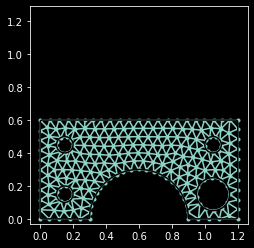

In [3]:
import dmsh
import meshio
import optimesh

r = dmsh.Rectangle(0.0, 1.2, 0.0, 0.6)
c = dmsh.Circle([0.6, 0.0], 0.3)
c1 = dmsh.Circle([0.15,0.15], 0.05)
c2 = dmsh.Circle([1.05,0.15], 0.1)
c3 = dmsh.Circle([0.15,0.45], 0.05)
c4 = dmsh.Circle([1.05,0.45], 0.05)
geo = r - (c + c1 + c2 + c3 + c4)
#geo = r - c
nodes, elements = dmsh.generate(geo, 0.05)

dmsh.helpers.show(nodes, elements, geo)

In [4]:
dt = 1/24
output_freq = 1
t_range = (0.0, 10.0)

F = lambda x,y,t: 0

# dirichlet
G = lambda x,y,t: 1-t/10

boundary_nodes = find_boundary_nodes(elements)
setup = Setup(nodes, boundary_nodes, elements, F, G, t_range, dt, output_freq)

In [5]:
DIMENSION_DOMAIN = 2
NODES_PER_ELEMENT = 3


Equation indecces mapping

In [24]:
global_size = len(setup.nodes)
ID = np.arange(global_size).reshape(-1, 1)

Finite Element class

In [25]:
class FiniteElement:
    size = NODES_PER_ELEMENT
    
    def __init__(self, e, setup, rhs):
        self.setup = setup
        self.rhs = rhs

        # Calculate element element_eq_ids and coordinates 
        # element_eq_ids has the equations associated to element e
        self.eq_ids = np.zeros(FiniteElement.size)
        self.coord = np.zeros((NODES_PER_ELEMENT, DIMENSION_DOMAIN))
        self.node_ids = np.zeros(NODES_PER_ELEMENT)
        z = 0
        for j in range(NODES_PER_ELEMENT):
            J = int(setup.elements[e, j]) # global node of element
            
            #for direction in range(DIMENSION):
            #    self.eq_ids[z] = ID[J, direction]
            #    z += 1
            self.eq_ids[j] = ID[J, 0]
            
            self.coord[j] = setup.nodes[J]
            self.node_ids[j] = J
            
        self.A, self.B, self.area = self.make_integrals_and_area()
        self.K, self.F = self.make_stiffness_matrix()

    def make_integrals_and_area(self):
        i = 0; j = 1; k = 2
        x = 0; y = 1
        
        coord = self.coord
        ci = - coord[j, x] + coord[k, x]
        cj = - coord[k, x] + coord[i, x]
        ck = - coord[i, x] + coord[j, x]

        bi = coord[j, y] - coord[k, y]
        bj = coord[k, y] - coord[i, y]
        bk = coord[i, y] - coord[j, y]

        d = (ck * bj - cj * bk)
        area = d / 2
        
        A = area * np.array([
            [1/6, 1/12, 1/12],
            [1/12, 1/6, 1/12],
            [1/12, 1/12, 1/6]
        ])
        
        B = area * np.array([
            [2, -1, -1],
            [-1, 1, 0],
            [-1, 0, 1]
        ])
        return A, B, area

    def make_stiffness_matrix(self):
        dt = self.setup.dt
        coord = self.coord

        Ke = self.A + dt*self.B
        we = np.array([self.rhs[int(node_id)] for node_id in self.node_ids])
        Fe = self.A.dot(we)
        return Ke, Fe

In [26]:
def solve(setup, dirichlet, u, f):
    K = np.zeros((global_size, global_size))
    F = np.zeros((global_size, 1))

    rhs = u + setup.dt * f
    for e in range(len(setup.elements)):
        element = FiniteElement(e, setup, rhs)

        for i in range(FiniteElement.size):
            I = int(element.eq_ids[i])
            for j in range(FiniteElement.size):
                J = int(element.eq_ids[j])  
                # Adds element matrix K to global matrix K
                K[I, J] += element.K[i,j]
            # Adds load element vector F in F
            F[I] += element.F[i]
            
    # Dirichlet
    for node, value in dirichlet:    
        i = ID[int(node), 0]  # >_<
        F[:, 0] = F[:, 0] - value * K[:, i]
        K[i, :] = 0.0
        K[:, i] = 0.0
        K[i, i] = 1.0
        F[i] = value
        
    return np.squeeze(np.linalg.solve(K, F).reshape(len(setup.nodes), 1))

In [27]:
%%time

u_matrix = np.zeros((len(setup.nodes), setup.t_num // setup.output_freq))

u = np.zeros(len(setup.nodes))
for node in setup.boundary_nodes:
    x,y = setup.nodes[node]
    value = setup.g(x,y,setup.T[0])
    u[node] = value

u_matrix[:,0] = u

for t in range(1, (setup.t_num // setup.output_freq) * setup.output_freq):
    fn = np.array([setup.f(xi, yi, setup.T[t]) for (xi, yi) in setup.nodes])
    dirichlet = []
    for node in setup.boundary_nodes:
        x,y = setup.nodes[node]
        value = setup.g(x,y,setup.T[t])
        dirichlet.append([node, value])
        
    u = solve(setup, dirichlet, u, fn)
    if t % setup.output_freq == 0:
        u_matrix[:, t // setup.output_freq] = u

CPU times: user 16.4 s, sys: 9.47 s, total: 25.9 s
Wall time: 3.57 s


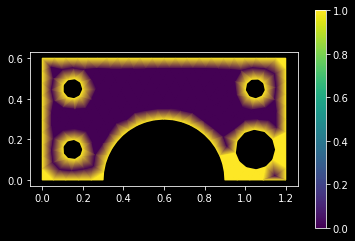

In [28]:
fig = plt.figure()
ax = plt.subplot(111)
txt_title = ax.set_title('')
plt.gca().set_aspect('equal')
field = ax.tripcolor(nodes[:, 0], nodes[:,1], elements, u_matrix[:,0], shading='gouraud')
fig.colorbar(field)
#plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def update_tripcolor(frame_number):
    field.set_array(u_matrix[:,frame_number])
    txt_title.set_text('t = {0:.4f}'.format(setup.T[setup.output_freq*frame_number]))

anim = FuncAnimation(fig, update_tripcolor, interval=1000*dt*setup.output_freq, frames=len(u_matrix[0,:]))
HTML(anim.to_jshtml())


----